<a href="https://colab.research.google.com/github/mathewhall100/fastai-course2019/blob/master/ISIC_skin_lesions_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISIC Skin Lesion Identification

## Setup

In [52]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
!pip install nbformat
!pip install nbconvert==5.4.1


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
sz = 224

## Get data

In [57]:
PATH = root_dir + "Colab Notebooks/data/ISIC2/" ; PATH


'/content/gdrive/My Drive/Colab Notebooks/data/ISIC2/'

In [58]:
os.listdir(f'{PATH}/train')

['maligmelanoma', 'nevi']

In [59]:
os.listdir(f'{PATH}/valid')

['nevi', 'maligmelanoma']

In [212]:
train_set_mm = os.listdir(f'{PATH}/train/maligmelanoma')
print('train: maligmelanoma')
len(train_set_mm)


train: maligmelanoma


1975

In [213]:
train_set_bn = os.listdir(f'{PATH}/train/nevi')
print('train: bengn nevus')
len(train_set_bn)

train: bengn nevus


1884

In [215]:
valid_set_mm = os.listdir(f'{PATH}/valid/maligmelanoma')
print('valid: maligmelanoma')
len(valid_set_mm)

valid: maligmelanoma


193

In [218]:
valid_set_bn = os.listdir(f'{PATH}/valid/nevi')
print('train: benign nevus')
len(valid_set_bn)

train: benign nevus


216

In [0]:
files = os.listdir(f'{PATH}/train/maligmelanoma')[:1]

In [197]:
files

['ISIC_0025546.jpg',
 'ISIC_0025531.jpg',
 'ISIC_0025603.jpg',
 'ISIC_0025592.jpg',
 'ISIC_0025589.jpg',
 'ISIC_0025611.jpg',
 'ISIC_0025616.jpg',
 'ISIC_0025708.jpg',
 'ISIC_0025651.jpg',
 'ISIC_0025709.jpg',
 'ISIC_0025674.jpg',
 'ISIC_0025663.jpg',
 'ISIC_0025748.jpg',
 'ISIC_0025724.jpg',
 'ISIC_0025732.jpg',
 'ISIC_0025744.jpg']

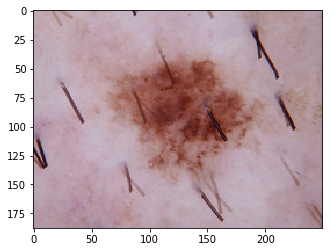

In [198]:
img = plt.imread(f'{PATH}/train/maligmelanoma/{files[0]}')
plt.imshow(img)
              

Melanoma images


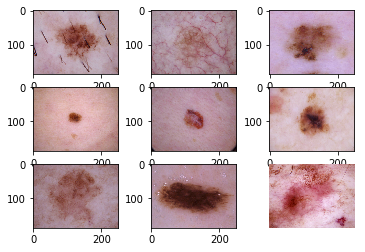

In [190]:
print("Melanoma images")
f, axarr = plt.subplots(3,3)
for x in range(3):
  for y in range(3):
    z=(x*3)+y
    img = plt.imread(f'{PATH}train/maligmelanoma/{files[z]}')
    plt.axis('off')
    axarr[x,y].imshow(img)

In [0]:
files = os.listdir(f'{PATH}/train/nevi')[:10]

In [201]:
files

['ISIC_0031768.jpg',
 'ISIC_0031760.jpg',
 'ISIC_0031764.jpg',
 'ISIC_0031767.jpg',
 'ISIC_0031774.jpg',
 'ISIC_0031788.jpg',
 'ISIC_0031775.jpg',
 'ISIC_0031777.jpg',
 'ISIC_0031781.jpg',
 'ISIC_0031776.jpg']

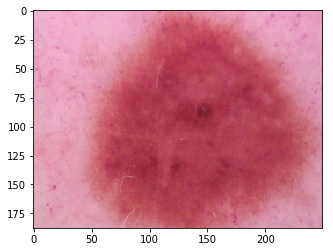

In [202]:
img = plt.imread(f'{PATH}train/nevi/{files[1]}')  
plt.imshow(img)

Benign nevus images


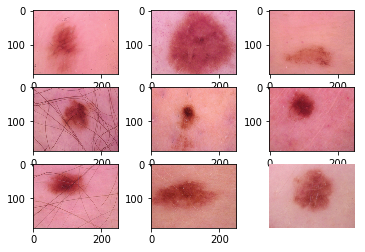

In [203]:
print("Benign nevus images")
f, axarr = plt.subplots(3,3)
for x in range(3):
  for y in range(3):
    z=(x*3)+y
    img = plt.imread(f'{PATH}train/nevi/{files[z]}')
    plt.axis('off')
    axarr[x,y].imshow(img)

In [0]:
doc(ImageDataBunch.from_folder)

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)

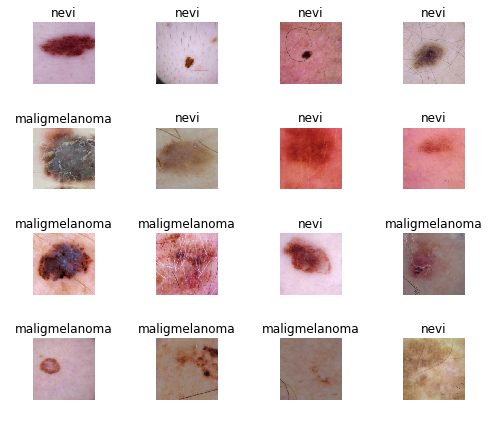

In [69]:
data.show_batch(rows=4, figsize=(7,6))

## Learn

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.model

In [113]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.503849,0.618896,0.645477,01:00
1,0.493570,0.640371,0.672372,01:00
2,0.461175,0.615410,0.655257,01:00
3,0.432312,0.613734,0.650367,01:00
4,0.401151,0.612501,0.635697,01:00


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

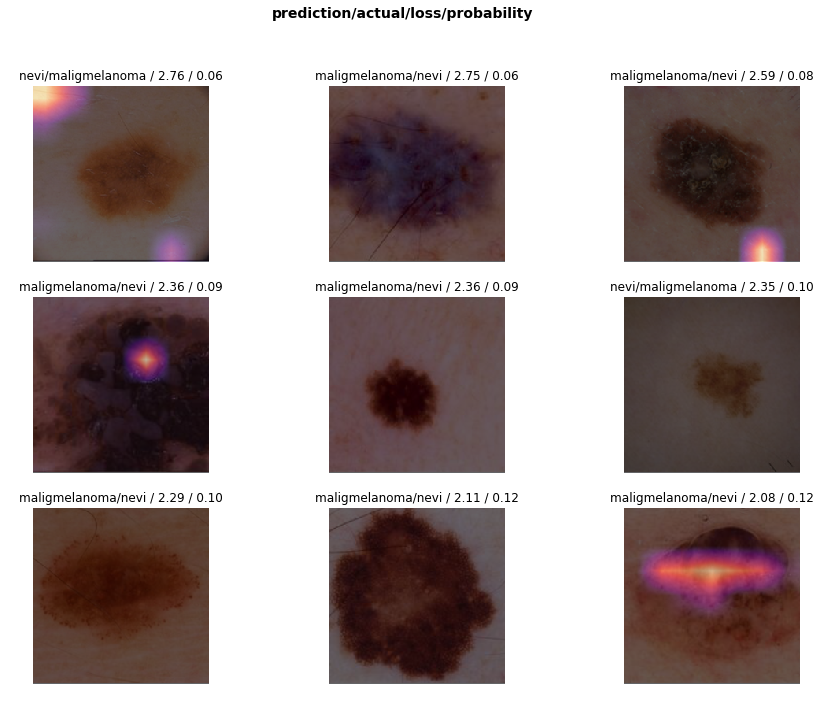

In [115]:
interp.plot_top_losses(9, figsize=(15,11))

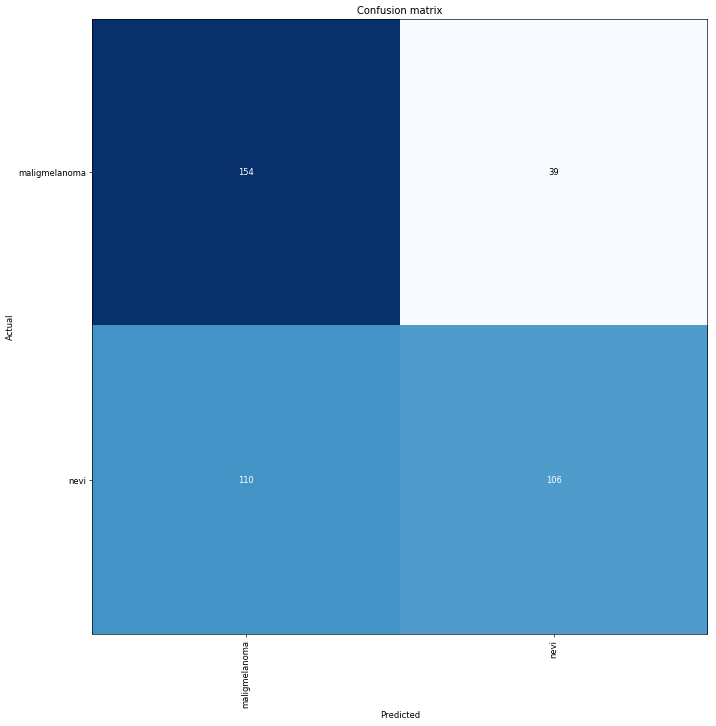

In [116]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.save('stage1')

## Unfreezing

In [0]:
learn.unfreeze()

In [119]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.446462,0.721346,0.591687,01:04


## Learning rate finder

In [0]:
learn.load('stage1')

In [80]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


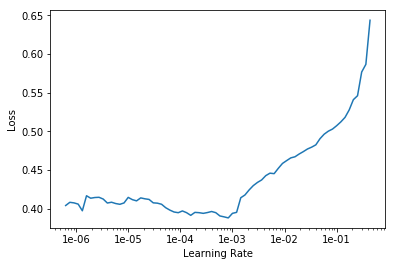

In [81]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [122]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.388544,0.605746,0.667482,01:04
1,0.374824,0.603459,0.669927,01:04
2,0.364364,0.618848,0.647922,01:04
3,0.349067,0.603063,0.679707,01:05
4,0.345123,0.616447,0.650367,01:05


In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [127]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.391966,0.630855,0.650367,01:04
1,0.373560,0.597878,0.709046,01:04
2,0.340092,0.620916,0.679707,01:04
3,0.300792,0.605826,0.704156,01:04
4,0.277539,0.609221,0.706601,01:04


## Increasing image size

In [0]:
sz=300

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)

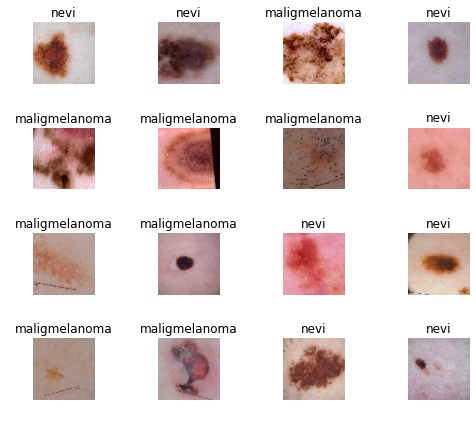

In [138]:
data.show_batch(rows=4, figsize=(7,6))


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [143]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.403682,0.675096,0.618582,01:40
1,0.382645,0.690341,0.616137,01:38
2,0.341055,0.728676,0.608802,01:37
3,0.300302,0.726457,0.618582,01:38
4,0.269569,0.720594,0.628362,01:37


## Data Augmentation

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(max_rotate=90, do_flip='true'), size=sz, bs=bs).normalize(imagenet_stats)

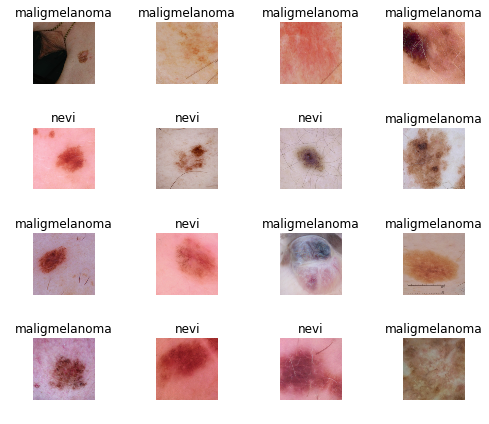

In [228]:
data.show_batch(rows=4, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [232]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.406961,0.630437,0.630807,01:15
1,0.387470,0.613543,0.677262,01:15
2,0.365675,0.678952,0.616137,01:15
3,0.347268,0.649073,0.657702,01:15
4,0.322033,0.654113,0.657702,01:15


## Resnet50

In [233]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 24904059.55it/s]


In [0]:
learn.model

In [237]:
learn.fit_one_cycle(5, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.817520,0.662334,0.633252,01:32
1,0.653055,0.719309,0.645477,01:25
2,0.587450,0.688290,0.652812,01:26
3,0.551260,0.695350,0.635697,01:25
4,0.525608,0.729645,0.635697,01:27


In [238]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


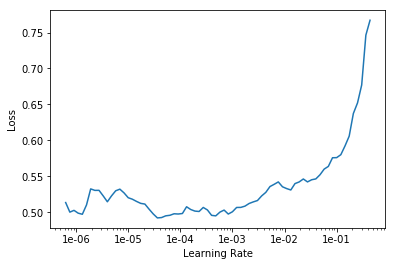

In [240]:
learn.recorder.plot()

In [0]:
learn.save('resnet50_stage1')

In [0]:
learn.unfreeze()

In [244]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.531045,0.781275,0.613692,01:52
1,0.492815,0.772598,0.608802,01:50
2,0.489789,0.677091,0.665037,01:50
3,0.444399,0.746779,0.628362,01:50
4,0.439157,0.737504,0.640587,01:50
